In [1]:
import numpy as np
import tweepy
import pandas as pd
import requests
from tweepy import OAuthHandler
import json
import os
from timeit import default_timer as timer
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data Gathering

In [2]:
df_twitter_archive= pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
df_twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [5]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
r

<Response [200]>

In [7]:
folder_name='image_prediction'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [8]:
with open(os.path.join(folder_name,url.split('/')[-1]),mode='wb') as file:
    file.write(r.content)

In [9]:
os.listdir(folder_name)

['image-predictions.tsv']

In [4]:
image_prediction=pd.read_csv('image_prediction\image-predictions.tsv',sep='\t')

In [4]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [10]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888


KeyboardInterrupt: 

In [5]:
with open('tweet-json.txt') as f:
    tweet_jsontxt=f.readlines()

In [6]:
tweet_json=[]
for i in tweet_jsontxt:
    j = json.loads(i)
    tweet_json.append(j)

In [7]:
tweet_count=[]
for i in tweet_json:
    tweet_id = i['id']
    tweet_fav=i['favorite_count']
    retweet = i['retweet_count']
    tweet_count.append({'tweet_id':int(tweet_id),
                       'favorite_count':int(tweet_fav),
                       'retweet_count': int(retweet)})

In [8]:
tweet_count

[{'tweet_id': 892420643555336193,
  'favorite_count': 39467,
  'retweet_count': 8853},
 {'tweet_id': 892177421306343426,
  'favorite_count': 33819,
  'retweet_count': 6514},
 {'tweet_id': 891815181378084864,
  'favorite_count': 25461,
  'retweet_count': 4328},
 {'tweet_id': 891689557279858688,
  'favorite_count': 42908,
  'retweet_count': 8964},
 {'tweet_id': 891327558926688256,
  'favorite_count': 41048,
  'retweet_count': 9774},
 {'tweet_id': 891087950875897856,
  'favorite_count': 20562,
  'retweet_count': 3261},
 {'tweet_id': 890971913173991426,
  'favorite_count': 12041,
  'retweet_count': 2158},
 {'tweet_id': 890729181411237888,
  'favorite_count': 56848,
  'retweet_count': 16716},
 {'tweet_id': 890609185150312448,
  'favorite_count': 28226,
  'retweet_count': 4429},
 {'tweet_id': 890240255349198849,
  'favorite_count': 32467,
  'retweet_count': 7711},
 {'tweet_id': 890006608113172480,
  'favorite_count': 31166,
  'retweet_count': 7624},
 {'tweet_id': 889880896479866881,
  'favor

In [9]:
tweet_info = pd.DataFrame(tweet_count, columns = ['tweet_id', 'favorite_count', 'retweet_count'])

In [12]:
tweet_info.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [13]:
tweet_info.to_csv('tweet_info.csv',index=False)

In [14]:
tweet_info=pd.read_csv('tweet_info.csv')

# Data Assessment

In [15]:
tweet_info.sample(6)

,tweet_id,favorite_count,retweet_count
2048,671497587707535361,980,481
1099,735635087207878657,6776,2659
970,750086836815486976,2383,613
1146,726887082820554753,4195,1677
2163,669367896104181761,485,172
71,878604707211726852,30931,7582


In [19]:
tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [20]:
tweet_info.shape

(2354, 3)

In [21]:
image_prediction.sample(6)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1833,836753516572119041,https://pbs.twimg.com/media/C5y-4VwWcAIcaoj.jpg,1,mortarboard,0.936882,False,academic_gown,0.020815,False,schipperke,0.011564,True
1238,746818907684614144,https://pbs.twimg.com/media/Cl071YVWEAAlF7N.jpg,1,dingo,0.175518,False,timber_wolf,0.133647,False,Ibizan_hound,0.101537,True
678,683498322573824003,https://pbs.twimg.com/media/CXxGGOsUwAAr62n.jpg,1,Airedale,0.945362,True,Irish_terrier,0.026850,True,Lakeland_terrier,0.016826,True
1471,779377524342161408,https://pbs.twimg.com/ext_tw_video_thumb/77937...,1,sundial,0.170921,False,cash_machine,0.060359,False,maze,0.054981,False
498,675820929667219457,https://pbs.twimg.com/media/CWD_jQMWEAAdYwH.jpg,1,basset,0.556373,True,beagle,0.201675,True,bloodhound,0.110848,True
743,687476254459715584,https://pbs.twimg.com/media/CYpoAZTWEAA6vDs.jpg,1,wood_rabbit,0.702725,False,Angora,0.190659,False,hare,0.105072,False


In [22]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
image_prediction.shape

(2075, 12)

In [24]:
type(image_prediction['jpg_url'][0])

str

In [25]:
image_prediction.p1.unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher',
       'Bernese_mountain_dog', 'box_turtle', 'chow', 'shopping_cart',
       'miniature_poodle', 'golden_retriever', 'Gordon_setter',
       'Walker_hound', 'pug', 'bloodhound', 'Lhasa', 'English_setter',
       'hen', 'desktop_computer', 'Italian_greyhound', 'Maltese_dog',
       'three-toed_sloth', 'ox', 'malamute', 'guinea_pig',
       'soft-coated_wheaten_terrier', 'Chihuahua',
       'black-and-tan_coonhound', 'coho', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'llama',
       'Chesapeake_Bay_retriever', 'curly-coated_retriever', 'dalmatian',
       'Ibizan_hound', 'Border_collie', 'Labrador_retriever', 'seat_belt',
       'snail', 'miniature_schnauzer', 'Airedale', 'triceratops', 'swab',
       'hay', 'hyena', 'jigsaw_puzzle', 'West_Highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'Rottweiler',
       'Siberian_husky', 't

In [26]:
df_twitter_archive.sample(6)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1919,674269164442398721,NaN,NaN,2015-12-08 16:47:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bob. He's a Juniper Fitzsimmons. His b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674269164...,8,10,Bob,None,None,None,None
968,750147208377409536,NaN,NaN,2016-07-05 02:00:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","And finally, happy 4th of July from the squad ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/750147208...,13,10,None,None,None,None,None
636,793500921481273345,NaN,NaN,2016-11-01 17:12:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Fiona. She's an extremely mediocre cop...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793500921...,12,10,Fiona,None,None,None,None
634,793614319594401792,NaN,NaN,2016-11-02 00:42:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: When she says you're a good boy...,7.916723e+17,4.196984e+09,2016-10-27 16:06:04 +0000,https://twitter.com/dog_rates/status/791672322...,13,10,None,None,None,None,None
201,853760880890318849,NaN,NaN,2017-04-17 00:03:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Alice. I'm told she enjoys car ri...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/853760880...,12,10,Alice,None,None,None,None
1141,727644517743104000,NaN,NaN,2016-05-03 23:42:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo struggling to cope with the win...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/727644517...,13,10,None,doggo,None,None,None


In [27]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [28]:
df_twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [29]:
df_twitter_archive[df_twitter_archive.rating_denominator==0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [30]:
df_twitter_archive.source[0]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [31]:
df_twitter_archive[df_twitter_archive.rating_numerator==0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


In [105]:
df_twitter_archive[df_twitter_archive.rating_numerator>30]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None


In [ ]:
df_twitter_archive

## Quality 
- Some dogs prediction names are innacurate such as ( box-turtle, hen, water bottle, toilet seat, etc...)
- The number of rows in each evry dataset is different
- An unnecessary "0000+" in the end of the timestamp collumn in df_twitter_archive
- Missing data on the stage of a dog (doggo, floofler, pupper, or puppo)
- Rating denominator is equel to 0 in 1 row
- Rating numerator is equel to 0 in 2 row
- Some values in the rating numerator are too large
- Some values in the rating denominator are too large
- Replace "none" with nulls in twitter archive dog stages
- Retweets are present in the twitter archive data set

## Tidiness Issues
- Some columns are not needed in the analysis
- It would be better if the columns we need would be merged into one table
- Join the dog stage columns into one column

# Data cleaning

In [16]:
df_twitter_archive_clean=df_twitter_archive.copy()

In [17]:
image_prediction_clean= image_prediction.copy()

## Quality

# Define

### Some dogs prediction names are innacurate such as ( box-turtle, hen, water bottle, toilet seat, etc...)

### Drop rows with inaccurate dog prediction names

## Code:

In [18]:
image_prediction.p1.unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher',
       'Bernese_mountain_dog', 'box_turtle', 'chow', 'shopping_cart',
       'miniature_poodle', 'golden_retriever', 'Gordon_setter',
       'Walker_hound', 'pug', 'bloodhound', 'Lhasa', 'English_setter',
       'hen', 'desktop_computer', 'Italian_greyhound', 'Maltese_dog',
       'three-toed_sloth', 'ox', 'malamute', 'guinea_pig',
       'soft-coated_wheaten_terrier', 'Chihuahua',
       'black-and-tan_coonhound', 'coho', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'llama',
       'Chesapeake_Bay_retriever', 'curly-coated_retriever', 'dalmatian',
       'Ibizan_hound', 'Border_collie', 'Labrador_retriever', 'seat_belt',
       'snail', 'miniature_schnauzer', 'Airedale', 'triceratops', 'swab',
       'hay', 'hyena', 'jigsaw_puzzle', 'West_Highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'Rottweiler',
       'Siberian_husky', 't

In [19]:
wrong_names=['nail', 'hammer', 'home_theater', 'alp', 'bonnet', 'handkerchief',
       'hand_blower', 'polecat', 'lakeside', 'studio_couch', 'cup',
       'cliff', 'lawn_mower', 'balloon',
       'sunglasses', 'rapeseed', 'traffic_light', 'coil', 'binoculars',
       'paddle', 'tiger_shark', 'sulphur-crested_cockatoo', 'American_black_bear',
       'rotisserie', 'conch', 'skunk', 'bookshop', 'radio_telescope',
       'cougar', 'African_grey', 'coral_reef', 'lion', 'maillot',
       'Madagascar_cat', 'tabby', 'silky_terrier', 'giant_panda',
       'long-horned_beetle'
         , 'sundial',
       'padlock', 'pool_table', 'quilt', 'beach_wagon', 'remote_control',
       'bakery', 'pedestal', 'gas_pump', 'bookcase', 'shield', 'loupe',
       'restaurant', 'prison', 'school_bus', 'cowboy_boot', 'jersey',
       'wooden_spoon', 'leopard', 'mortarboard', 'teapot',
       'military_uniform', 'washer', 'coffee_mug', 'fountain',
       'pencil_box', 'barbell', 'grille', 'revolver', 'envelope',
       'syringe', 'marmot', 'pole', 'laptop', 'basketball', 'tricycle',
       'convertible', 'limousine', 'orange', 'vacuum', 'Rottweiler',
        'teddy', 'papillon', 'Saint_Bernard',
        'goose',
       'hare', 'electric_fan',
       'web_site', 'fire_engine', 'lorikeet',
       'toyshop', 'common_iguana',
        'frilled_lizard', 'leatherback_turtle',
       'hamster', 'Arctic_fox', 'trombone', 'canoe',
       'king_penguin', 'shopping_basket',  'bearskin',
       'bustard', 'crash_helmet'
       , 'ski_mask',
        'shower_curtain', 'jellyfish',
       'doormat', 'Arabian_camel', 'lynx', 'hog', 'comic_book', 'minivan',
       'seashore', 'cuirass', 'candle',
        'Christmas_stocking', 'washbasin', 'car_mirror',
       'piggy_bank', 'pot', 'boathouse', 'mud_turtle',
        'platypus'
       , 'ping-pong_ball', 'sea_urchin', 'bow_tie',
       'window_shade', "jack-o'-lantern", 'sorrel', 
       'peacock', 'axolotl', 'wool', 'banana',
        'wood_rabbit', 'dhole',
        'lacewing', 'brown_bear',
        'scorpion', 'flamingo', 'microphone'
       , 'pitcher', 'refrigerator',
       'picket_fence', 'tub', 'zebra', 'hermit_crab', 'swing',
       'park_bench', 'feather_boa', 'Loafer', 'stone_wall', 'ice_bear',
       'prayer_rug', 'chimpanzee', 'china_cabinet', 'bee_eater',
       'tennis_ball', 'carton', 'killer_whale', 'ostrich', 'terrapin',
       'Siamese_cat', 'gondola', 'microwave',
       'starfish', 'sandbar', 'tusker', 'motor_scooter', 'ram',
       'leaf_beetle', 'wombat',
        'water_bottle', 'suit', 'toilet_seat',
       'robin', 'Cardigan', 'slug',
       'toilet_tissue', 'acorn_squash', 'soccer_ball',
       'African_crocodile', 'tick', 'ocarina', 'street_sign',
       'bow', 'stove', 'paper_towel', 'upright', 'dough',
        'bath_towel',
       'walking_stick', 'bubble',
       'book_jacket', 'rain_barrel', 'black-footed_ferret', 'guenon',
        'water_buffalo', 'patio', 'cowboy_hat',
       'dogsled', 'maze', 'harp', 'panpipe', 'cash_machine', 'mailbox',
       'wallaby', 'earthstar', 'pillow',
       'space_heater', 'carousel', 'birdhouse', 'snorkel',
       'bald_eagle', 'koala', 'cheetah', 'minibus',
        'clog', 'dishwasher', 'white_wolf', 'sliding_door',
       'damselfly', 'cheeseburger',
       'fiddler_crab', 'bannister', 'crane',
       'snowmobile', 'badger', 'bighorn', 'geyser', 'barrow', 'bison',
       'ice_lolly', 'sea_lion', 'dining_table',
        'beaver',
       'Appenzeller', 'grey_fox', 'mousetrap', 'hippopotamus',
        'hummingbird', 'tailed_frog', 'otter',
       'Egyptian_cat', 'four-poster', 'wild_boar', 'bathtub', 'agama',
       'muzzle', 'hotdog', 'bib', 'espresso', 'timber_wolf', 'meerkat','shopping_cart','hen','guinea_pig','desktop_computer',
       'ox','llama','snail','seat_belt','swab',
       'hay', 'hyena', 'jigsaw_puzzle']

In [20]:
wrong_index = image_prediction_clean.query('p1 in @wrong_names').index

In [21]:
image_prediction_clean.drop(image_prediction_clean.index[wrong_index],axis='index',inplace=True)

## Test

In [22]:
image_prediction_clean.p1.unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher',
       'Bernese_mountain_dog', 'box_turtle', 'chow', 'miniature_poodle',
       'golden_retriever', 'Gordon_setter', 'Walker_hound', 'pug',
       'bloodhound', 'Lhasa', 'English_setter', 'Italian_greyhound',
       'Maltese_dog', 'three-toed_sloth', 'malamute',
       'soft-coated_wheaten_terrier', 'Chihuahua',
       'black-and-tan_coonhound', 'coho', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'Chesapeake_Bay_retriever',
       'curly-coated_retriever', 'dalmatian', 'Ibizan_hound',
       'Border_collie', 'Labrador_retriever', 'miniature_schnauzer',
       'Airedale', 'triceratops', 'West_Highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'Siberian_husky',
       'porcupine', 'Tibetan_terrier', 'borzoi', 'beagle',
       'Yorkshire_terrier', 'Pomeranian', 'ibex', 'kuvasz',
       'flat-coated_retriever', 'Norwegian_elkhound', 'Angora',


## An unnecessary "0000+" in the end of the timestamp collumn in df_twitter_archive

### Remove it

## Missing data on the stage of a dog (doggo, floofler, pupper, or puppo)

In [24]:
df_twitter_archive_clean.query('doggo == "None" and floofer == "None" and pupper == "None" and puppo == "None" ').shape

(1976, 17)

In [25]:
df_twitter_archive_clean.shape

(2356, 17)

### More than half of the dataset have missing values for the dog stages,  thus we cannot drop it.
### We also do not have any resource to complete the missing information, and for that we cannot solve this problem

# Define

## Rating denominator is equel to 0 in 1 row

### Drop that row

## Code:

In [26]:
den_0=df_twitter_archive_clean.query('rating_denominator==0').index

In [27]:
df_twitter_archive_clean.drop(df_twitter_archive_clean.index[den_0],axis='index',inplace=True)

## Test:

In [28]:
df_twitter_archive_clean.query('rating_denominator==0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


## Define:

## Rating numerator is equel to 0 in 2 row

### Drop those rows

## Code:

In [29]:
numerator_0=df_twitter_archive_clean.query('rating_numerator==0').index

In [30]:
numerator_0

Int64Index([315, 1016], dtype='int64')

In [31]:
df_twitter_archive_clean.drop(numerator_0,axis='index',inplace=True)

## Test:

In [32]:
df_twitter_archive_clean.query('rating_numerator==0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


## Define:

## Some values in the rating numerator are too large

### Drop those rows

##  Code:

In [33]:
numer_large=df_twitter_archive_clean[df_twitter_archive_clean.rating_numerator>30].index

In [34]:
df_twitter_archive_clean.drop(numer_large,axis='index',inplace=True)

## Test:

In [35]:
df_twitter_archive_clean[df_twitter_archive_clean.rating_numerator>30]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


## Define:

## Some values in the rating denominator are too large

## Test:

In [92]:
df_twitter_archive_clean[df_twitter_archive_clean.rating_denominator>30]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### The problem has been solved by dropping the numerators that were too large

## Define:

## Retweets are present in the twitter archive data set

### Drop those rows

## Code:

In [99]:
retweets_index=df_twitter_archive_clean.query('in_reply_to_user_id==in_reply_to_user_id').index

In [101]:
df_twitter_archive_clean.drop(retweets_index,axis='index',inplace=True)

## Test:

In [103]:
df_twitter_archive_clean.query('in_reply_to_user_id==in_reply_to_user_id')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


## Code:

In [158]:
reply_index=df_twitter_archive_clean.query('retweeted_status_user_id==retweeted_status_user_id').index

In [159]:
df_twitter_archive_clean.drop(reply_index,axis='index',inplace=True)

## Test:

In [160]:
df_twitter_archive_clean.query('retweeted_status_user_id==retweeted_status_user_id')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage


## "None" pressent in twitter archive dog stages

### Replace "None" with nulls

## Code:

In [109]:
df_twitter_archive_clean['doggo']=df_twitter_archive_clean['doggo'].replace('None', np.nan)
df_twitter_archive_clean['floofer']=df_twitter_archive_clean['floofer'].replace('None', np.nan)
df_twitter_archive_clean['pupper']=df_twitter_archive_clean['pupper'].replace('None', np.nan)
df_twitter_archive_clean['puppo']=df_twitter_archive_clean['puppo'].replace('None', np.nan)

## Test:

In [110]:
df_twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN


# Tidiness

## Tidiness Issues
- Some columns are not needed in the analysis
- Merge columns into one table
- Join the dog stage columns into one column

## Define:

### Join the dog stage columns into one 

In [113]:
df_twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN


In [115]:
df_twitter_archive_clean.query('doggo==doggo').head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,NaN,NaN,NaN
43,884162670584377345,NaN,NaN,2017-07-09 21:29:42,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo,NaN,NaN,NaN
99,872967104147763200,NaN,NaN,2017-06-09 00:02:31,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/872967104...,12,10,None,doggo,NaN,NaN,NaN
108,871515927908634625,NaN,NaN,2017-06-04 23:56:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/871515927...,12,10,Napolean,doggo,NaN,NaN,NaN
110,871102520638267392,NaN,NaN,2017-06-03 20:33:19,"<a href=""http://twitter.com/download/iphone"" r...",Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,NaN,NaN,NaN,https://twitter.com/animalcog/status/871075758...,14,10,None,doggo,NaN,NaN,NaN


In [111]:
df_twitter_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

## Code:

In [119]:
melted=pd.melt(df_twitter_archive_clean,id_vars=['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name'],value_name='stage')
melted.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,variable,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,doggo,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,doggo,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,doggo,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,doggo,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,doggo,NaN


In [121]:
melted.drop('variable',axis=1,inplace=True)

In [123]:
df_twitter_archive_clean=melted

## Test:

In [125]:
df_twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


In [126]:
df_twitter_archive_clean.query('stage==stage')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo
42,884162670584377345,NaN,NaN,2017-07-09 21:29:42,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo
96,872967104147763200,NaN,NaN,2017-06-09 00:02:31,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/872967104...,12,10,None,doggo
105,871515927908634625,NaN,NaN,2017-06-04 23:56:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/871515927...,12,10,Napolean,doggo
107,871102520638267392,NaN,NaN,2017-06-03 20:33:19,"<a href=""http://twitter.com/download/iphone"" r...",Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,NaN,NaN,NaN,https://twitter.com/animalcog/status/871075758...,14,10,None,doggo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7660,752519690950500352,NaN,NaN,2016-07-11 15:07:30,"<a href=""http://twitter.com/download/iphone"" r...",Hopefully this puppo on a swing will help get ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/752519690...,11,10,None,puppo
7674,751132876104687617,NaN,NaN,2016-07-07 19:16:47,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. He's just so damn happy. 10/10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751132876...,10,10,Cooper,puppo
7739,744995568523612160,NaN,NaN,2016-06-20 20:49:19,"<a href=""http://twitter.com/download/iphone"" r...",This is Abby. She got her face stuck in a glas...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/744995568...,9,10,Abby,puppo
7752,743253157753532416,NaN,NaN,2016-06-16 01:25:36,"<a href=""http://twitter.com/download/iphone"" r...",This is Kilo. He cannot reach the snackum. Nif...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743253157...,10,10,Kilo,puppo


In [162]:
df_twitter_archive_clean.to_csv('df_twitter_archive_clean.csv',index=False)
image_prediction_clean.to_csv('image_prediction_clean.csv',index=False)

In [29]:
df_twitter_archive_clean=pd.read_csv('df_twitter_archive_clean.csv')
image_prediction_clean=pd.read_csv('image_prediction_clean.csv')
tweet_info=pd.read_csv('tweet_info.csv')

## Define:

# Tidiness:
## Merge columns into one table

# Quality:
## The number of rows in each dataset is different

### Both can be solved in the same time

## Code:

In [30]:
df_twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


In [31]:
image_prediction_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [32]:
master_df=pd.merge(df_twitter_archive_clean,image_prediction_clean,on='tweet_id',how='inner')
master_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
3,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
4,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5691,666029285002620928,NaN,NaN,2015-11-15 23:05:30,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,...,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
5692,666020888022790149,NaN,NaN,2015-11-15 22:32:08,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,...,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
5693,666020888022790149,NaN,NaN,2015-11-15 22:32:08,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,...,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
5694,666020888022790149,NaN,NaN,2015-11-15 22:32:08,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,...,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [33]:
master_df=pd.merge(master_df,tweet_info,on='tweet_id',how='inner')

## Test:

In [34]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5696 entries, 0 to 5695
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    5696 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   5696 non-null   object 
 4   source                      5696 non-null   object 
 5   text                        5696 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      float64
 9   expanded_urls               5696 non-null   object 
 10  rating_numerator            5696 non-null   int64  
 11  rating_denominator          5696 non-null   int64  
 12  name                        5696 non-null   object 
 13  stage                       234 n

## Define:

## Some columns are not needed in the analysis

### Drop them

## Code:

In [35]:
image_prediction_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [36]:
master_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'stage', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'favorite_count', 'retweet_count'],
      dtype='object')

In [37]:
master_df.drop(['p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog','in_reply_to_status_id', 'in_reply_to_user_id','text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp','text','img_num','source','p1_dog','name'],axis=1,inplace=True)

## Test:

In [38]:
master_df.head()

,tweet_id,timestamp,expanded_urls,rating_numerator,rating_denominator,stage,jpg_url,p1,p1_conf,favorite_count,retweet_count
0,892177421306343426,2017-08-01 00:17:27,https://twitter.com/dog_rates/status/892177421...,13,10,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,33819,6514
1,892177421306343426,2017-08-01 00:17:27,https://twitter.com/dog_rates/status/892177421...,13,10,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,33819,6514
2,892177421306343426,2017-08-01 00:17:27,https://twitter.com/dog_rates/status/892177421...,13,10,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,33819,6514
3,892177421306343426,2017-08-01 00:17:27,https://twitter.com/dog_rates/status/892177421...,13,10,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,33819,6514
4,891815181378084864,2017-07-31 00:18:03,https://twitter.com/dog_rates/status/891815181...,12,10,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,25461,4328


In [20]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5696 entries, 0 to 5695
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            5696 non-null   int64  
 1   timestamp           5696 non-null   object 
 2   expanded_urls       5696 non-null   object 
 3   rating_numerator    5696 non-null   int64  
 4   rating_denominator  5696 non-null   int64  
 5   stage               234 non-null    object 
 6   jpg_url             5696 non-null   object 
 7   p1                  5696 non-null   object 
 8   p1_conf             5696 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 445.0+ KB


## Define:

## Quality:
### for the sake of the analysis, We will drop the rows that the rating denominator is not equal to 10 and drop the rating denominatro column

## Code:

In [39]:
master_df.query('rating_denominator!= 10')

,tweet_id,timestamp,expanded_urls,rating_numerator,rating_denominator,stage,jpg_url,p1,p1_conf,favorite_count,retweet_count
1192,810984652412424192,2016-12-19 23:06:23,"https://www.gofundme.com/sams-smile,https://tw...",24,7,NaN,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,golden_retriever,0.871342,5927,1655
1193,810984652412424192,2016-12-19 23:06:23,"https://www.gofundme.com/sams-smile,https://tw...",24,7,NaN,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,golden_retriever,0.871342,5927,1655
1194,810984652412424192,2016-12-19 23:06:23,"https://www.gofundme.com/sams-smile,https://tw...",24,7,NaN,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,golden_retriever,0.871342,5927,1655
1195,810984652412424192,2016-12-19 23:06:23,"https://www.gofundme.com/sams-smile,https://tw...",24,7,NaN,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,golden_retriever,0.871342,5927,1655
2412,740373189193256964,2016-06-08 02:41:38,https://twitter.com/dog_rates/status/740373189...,9,11,NaN,https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg,golden_retriever,0.807644,20648,9220
2413,740373189193256964,2016-06-08 02:41:38,https://twitter.com/dog_rates/status/740373189...,9,11,NaN,https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg,golden_retriever,0.807644,20648,9220
2414,740373189193256964,2016-06-08 02:41:38,https://twitter.com/dog_rates/status/740373189...,9,11,NaN,https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg,golden_retriever,0.807644,20648,9220
2415,740373189193256964,2016-06-08 02:41:38,https://twitter.com/dog_rates/status/740373189...,9,11,NaN,https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg,golden_retriever,0.807644,20648,9220
2684,722974582966214656,2016-04-21 02:25:47,https://twitter.com/dog_rates/status/722974582...,4,20,NaN,https://pbs.twimg.com/media/CgiFjIpWgAA4wVp.jpg,Great_Dane,0.246762,4493,1764
2685,722974582966214656,2016-04-21 02:25:47,https://twitter.com/dog_rates/status/722974582...,4,20,NaN,https://pbs.twimg.com/media/CgiFjIpWgAA4wVp.jpg,Great_Dane,0.246762,4493,1764


In [42]:
master_df.drop(master_df.query('rating_denominator!= 10').index,axis='index',inplace = True)

## Test:

In [43]:
master_df.query('rating_denominator!= 10')

,tweet_id,timestamp,expanded_urls,rating_numerator,rating_denominator,stage,jpg_url,p1,p1_conf,favorite_count,retweet_count


## Code:

In [44]:
master_df.drop('rating_denominator',axis=1,inplace=True)

In [67]:
master_df.drop(master_df.query('rating>15').index,axis=0,inplace=True)

## Define:

## Tidiness:
### Rename column

## Code:

In [49]:
master_df.rename(columns={'rating_numerator': 'rating','p1':'breed_prediction','p1_conf':'prediction_confident'},inplace=True)

In [69]:
master_df.to_csv('twitter_archive_master.csv',index=False)

## Analysis

In [2]:
master_df=pd.read_csv('twitter_archive_master.csv')

In [3]:
master_df[['rating','favorite_count','retweet_count','prediction_confident']].describe()

,rating,favorite_count,retweet_count,prediction_confident
count,5668.000000,5668.000000,5668.000000,5668.000000
mean,10.843331,9304.799577,2799.436133,0.615256
std,1.794688,12798.047270,4845.326905,0.261702
min,2.000000,81.000000,16.000000,0.044333
25%,10.000000,2115.000000,628.000000,0.389136
50%,11.000000,4448.000000,1413.000000,0.619098
75%,12.000000,11701.000000,3249.000000,0.856590
max,14.000000,132810.000000,79515.000000,0.999956


In [4]:
master_df.groupby(['stage']).describe()

tweet_id                                                          \
           count          mean           std           min           25%   
stage                                                                      
doggo       58.0  8.016370e+17  4.559179e+16  7.160809e+17  7.590699e+17   
floofer      8.0  7.774838e+17  6.589128e+16  6.853075e+17  7.365400e+17   
pupper     149.0  7.246496e+17  6.048144e+16  6.721600e+17  6.801007e+17   
puppo       18.0  8.127681e+17  5.237429e+16  7.385375e+17  7.641363e+17   

                                                  rating             ...  \
                  50%           75%           max  count       mean  ...   
stage                                                                ...   
doggo    8.131650e+17  8.308546e+17  8.902403e+17   58.0  11.879310  ...   
floofer  7.627676e+17  8.137937e+17  8.833607e+17    8.0  11.875000  ...   
pupper   6.975964e+17  7.508688e+17  8.863661e+17  149.0  10.899329  ...   
puppo    8.118628e+17  8.586687e+17  8.896654e+17   18.0  11.888889  ...   

        favorite_count           retweet_count                             \
                   75%       max         count         mean           std   
stage                                                                       
doggo         20616.25  131075.0          58.0  7282.068966  13387.148771   
floofer       18623.25   33345.0           8.0  4776.750000   5732.138787   
pupper         8653.00  106827.0         149.0  2654.845638   4034.296186   
puppo         18872.75  132810.0          18.0  6277.666667  11333.128248   

                                                   
           min      25%     50%      75%      max  
stage                                              
doggo    725.0  2049.50  2878.5  4995.00  79515.0  
floofer  496.0  2167.00  3349.0  4130.75  18497.0  
pupper   103.0   761.00  1239.0  3065.00  32883.0  
puppo    716.0  1538.25  2509.0  4049.25  48265.0  

[4 rows x 40 columns]

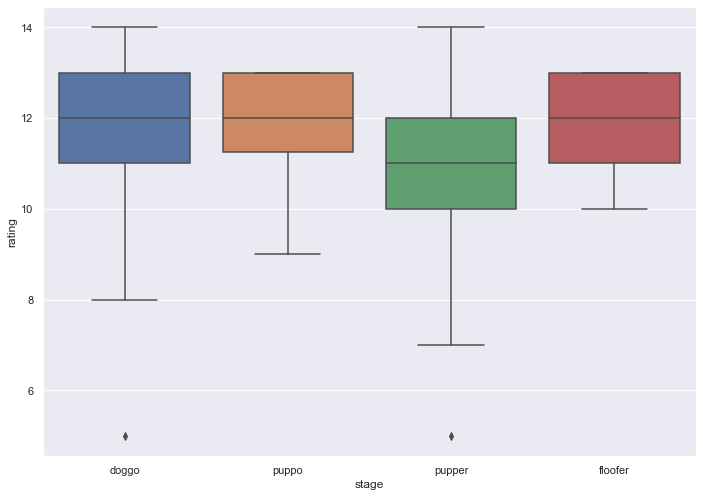

In [5]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(x="stage", y="rating", data=master_df)

### "doggo" is more likely to be rated high than the other breeds, and 'pupper' is more likey to be rated lower

In [6]:
master_df.groupby('breed_prediction')['favorite_count'].describe().sort_values('mean', ascending=False).reset_index()

,breed_prediction,count,mean,std,min,25%,50%,75%,max
0,Angora,8.0,37892.500000,39875.911816,592.0,592.00,37892.5,75193.00,75193.0
1,Saluki,16.0,24060.000000,18678.476440,3444.0,10886.25,20637.0,33810.75,51522.0
2,French_bulldog,104.0,17913.000000,21882.460769,341.0,3275.00,10421.5,26569.00,106827.0
3,Afghan_hound,12.0,17326.666667,8749.345631,7078.0,7078.00,17305.0,27597.00,27597.0
4,giant_schnauzer,8.0,17314.500000,18258.753525,235.0,235.00,17314.5,34394.00,34394.0
...,...,...,...,...,...,...,...,...,...
109,Ibizan_hound,12.0,1114.666667,912.508763,238.0,238.00,799.0,2307.00,2307.0
110,Brabancon_griffon,12.0,885.000000,273.499875,524.0,524.00,994.0,1137.00,1137.0
111,three-toed_sloth,4.0,522.000000,0.000000,522.0,522.00,522.0,522.00,522.0
112,ibex,4.0,517.000000,0.000000,517.0,517.00,517.0,517.00,517.0


### The top 5 breeds with the highest favorites are :(Angora, Saluki, French_bulldog, Afghan_hound, giant_schnauzer)

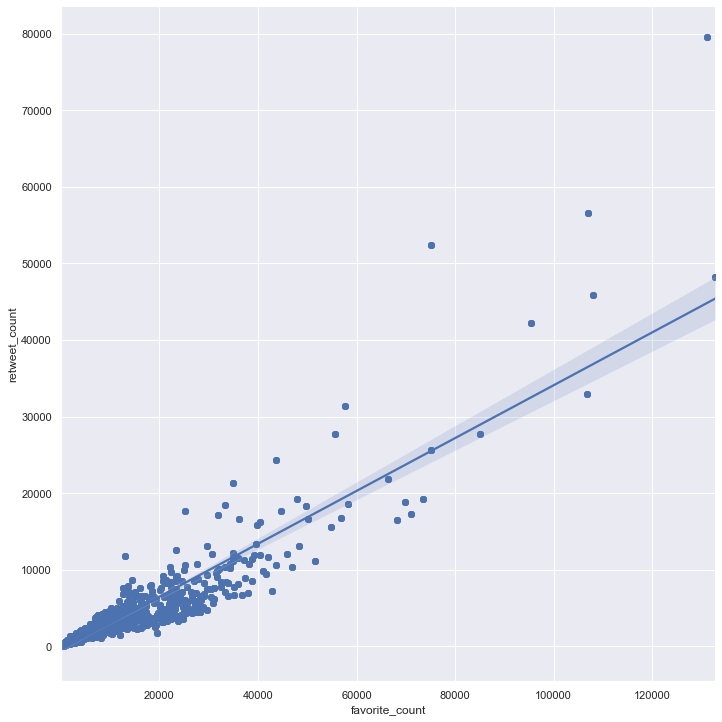

In [11]:
p = sns.lmplot(data=master_df, x="favorite_count", y="retweet_count",height=10)

### There seems to be a linear corelation betweeen the number of retweets  and the number of favorites

In [6]:
master_df.groupby('breed_prediction')['tweet_id'].describe().sort_values('count', ascending=False).reset_index()

,breed_prediction,count,mean,std,min,25%,50%,75%,max
0,golden_retriever,532.0,7.582898e+17,6.798216e+16,6.660638e+17,6.998018e+17,7.563033e+17,8.131876e+17,8.895311e+17
1,Labrador_retriever,364.0,7.485531e+17,6.899989e+16,6.667012e+17,6.789692e+17,7.442348e+17,8.036381e+17,8.827627e+17
2,Pembroke,348.0,7.561584e+17,7.407651e+16,6.664283e+17,6.849022e+17,7.478169e+17,8.243256e+17,8.902403e+17
3,Chihuahua,312.0,7.242511e+17,6.932577e+16,6.663962e+17,6.728776e+17,6.942879e+17,7.771898e+17,8.921774e+17
4,pug,216.0,7.157859e+17,6.075761e+16,6.660829e+17,6.739569e+17,6.912594e+17,7.356351e+17,8.862584e+17
...,...,...,...,...,...,...,...,...,...
109,EntleBucher,4.0,6.798621e+17,0.000000e+00,6.798621e+17,6.798621e+17,6.798621e+17,6.798621e+17,6.798621e+17
110,coho,4.0,6.664115e+17,0.000000e+00,6.664115e+17,6.664115e+17,6.664115e+17,6.664115e+17,6.664115e+17
111,Scotch_terrier,4.0,6.892838e+17,0.000000e+00,6.892838e+17,6.892838e+17,6.892838e+17,6.892838e+17,6.892838e+17
112,African_hunting_dog,4.0,6.711633e+17,0.000000e+00,6.711633e+17,6.711633e+17,6.711633e+17,6.711633e+17,6.711633e+17


<AxesSubplot:ylabel='breed_prediction'>

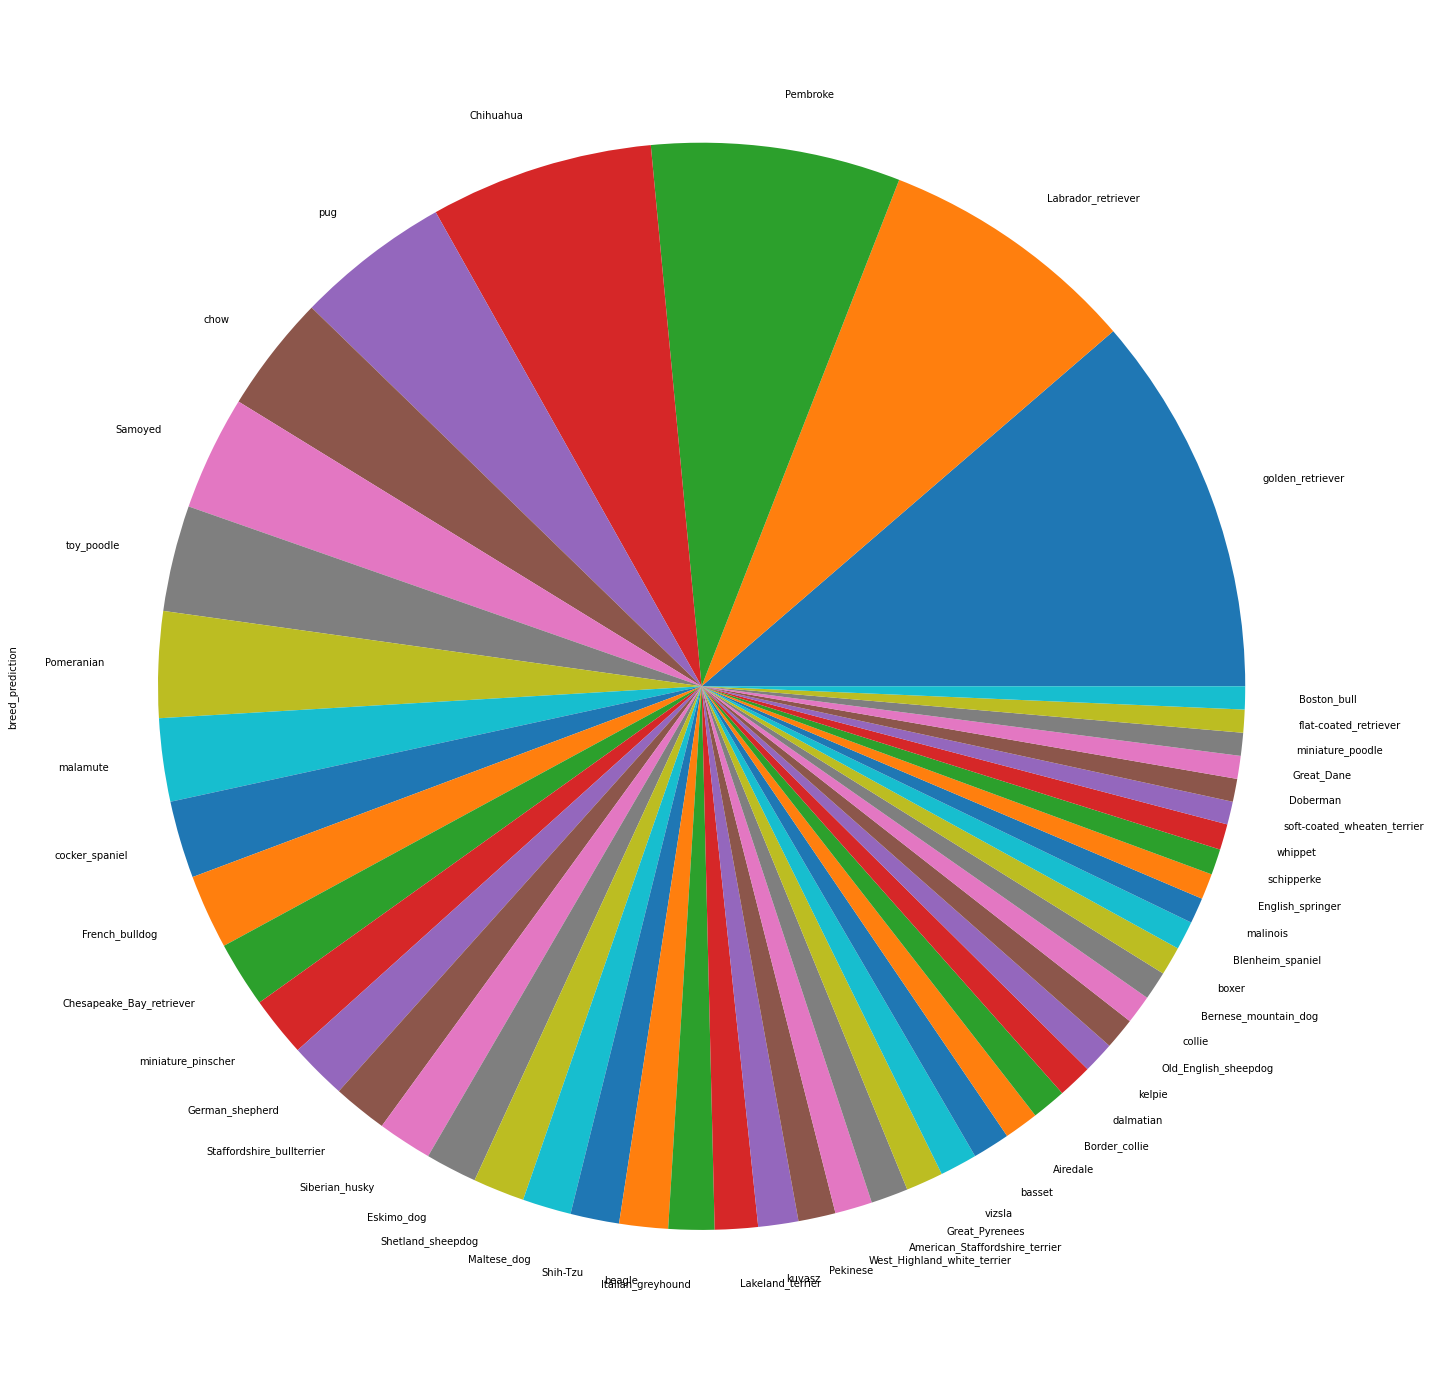

In [6]:
plt.rcParams["figure.figsize"] = (25,25)
master_df.breed_prediction.value_counts()[:50].plot.pie()

### The top 5 most repeeated breeds are: (golden retriever, Labrador retriever, Pembroke, Chihuahua, pug)